In [4]:
import matplotlib
print(matplotlib.__version__)

3.10.0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv(r"G:\BaiduNetdiskDownload\ML_NG\01-linear regression\ex1data1.txt",names=['population','profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [10]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


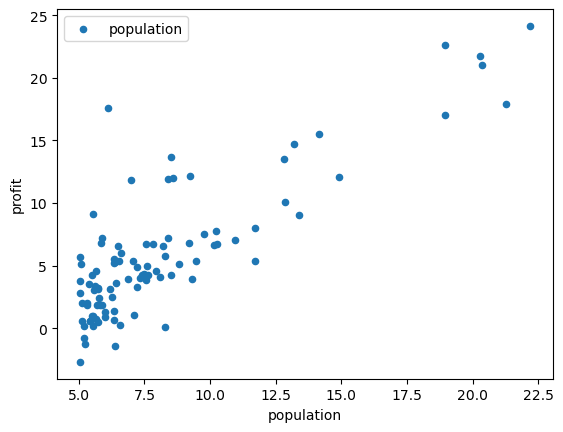

In [12]:
data.plot.scatter('population','profit',label='population')
plt.show()

In [13]:
data.insert(0,'ones',1)
data.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [14]:
X = data.iloc[:,0:-1]
X.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [15]:
y = data.iloc[:,-1]
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: profit, dtype: float64

In [16]:
X = X.values
X.shape

(97, 2)

In [17]:
y = y.values
y.shape

(97,)

In [18]:
y = y.reshape(97,1)
y.shape

(97, 1)

定义损失函数

In [19]:
def costFunction(X,y,theta):
    inner =np.power( X @ theta - y, 2)
    return np.sum(inner) / (2 * len(X))

In [20]:
theta = np.zeros((2,1))
theta.shape

(2, 1)

计算当参数都为0时的损失函数，这时肯定不是最优值，所以进行下一步

In [21]:
cost_init = costFunction(X,y,theta)
print(cost_init)

32.072733877455676


定义梯度下降函数，iters：迭代次数
costs = []：cost列表存所有的迭代函数
 costs.append(cost)：每更新一次就在costs里增加一个
 

In [22]:
def gradientDescent(X,y,theta,alpha,iters):
    costs = []
    
    for i in range(iters):
        theta = theta - (X.T @ (X@theta - y) ) * alpha / len(X)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        
        if i % 100 == 0:
            print(cost)
            
    return theta,costs

In [23]:
alpha = 0.02
iters = 2000

theta,costs = gradientDescent(X,y,theta,alpha,iters)

16.76964237166745
5.170668092303259
4.813840215803055
4.640559602034057
4.556412109403549
4.5155489085988645
4.495705166048674
4.486068766778817
4.481389196347322
4.479116731414093
4.478013190619409
4.477477295755764
4.477217057705424
4.477090682463859
4.477029312876824
4.476999510945953
4.476985038710984
4.476978010791016
4.476974597934662
4.476972940603823


通过上述2000次迭代可以看到损失函数从16逐步减小到4，然后几乎不再改变，应该就是迭代得差不多了，接下来可以可视化一下损失函数

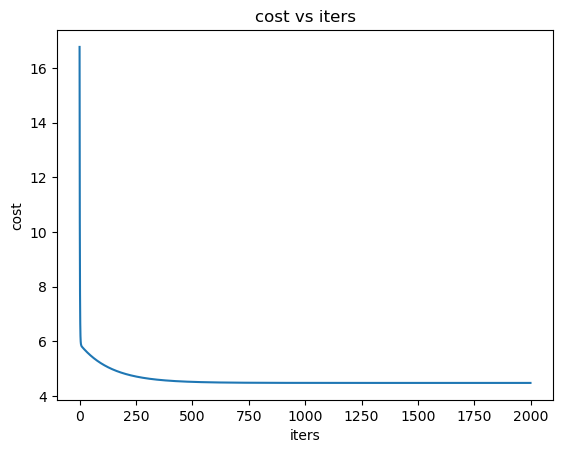

In [24]:
fig,ax = plt.subplots()
ax.plot(np.arange(iters),costs)
ax.set(xlabel='iters',
      ylabel='cost',
      title='cost vs iters')
plt.show()

In [ ]:
fig:整个图像，ax：表示一个实例